In [1]:
import pandas as pd
import numpy as np
import sqlite3

In [2]:
path_bd='/home/aluno/Documentos/api_streamlit/imoveis_prod.db'
conexao = sqlite3.connect(path_bd)

In [3]:
consulta = r"""SELECT CIDADE.NOME as 'cidade'
,ESTADO.NOME as 'estado'
,IMOVEIS.AREA as 'area'
,IMOVEIS.NUM_QUARTOS
,IMOVEIS.NUM_BANHEIROS
,IMOVEIS.NUM_ANDARES
,IMOVEIS.ACEITA_ANIMAIS
,IMOVEIS.MOBILIA
,IMOVEIS.VALOR_ALUGUEL
,IMOVEIS.VALOR_CONDOMINIO
,IMOVEIS.VALOR_IPTU
,IMOVEIS.VALOR_SEGURO_INCENDIO
FROM IMOVEIS INNER JOIN CIDADE
ON IMOVEIS.CODIGO_CIDADE = CIDADE.CODIGO
INNER JOIN ESTADO
ON CIDADE.CODIGO_ESTADO = ESTADO.CODIGO;
"""

In [4]:
df = pd.read_sql_query(consulta, conexao)

In [5]:
df.head(10)

,cidade,estado,area,num_quartos,num_banheiros,num_andares,aceita_animais,mobilia,valor_aluguel,valor_condominio,valor_iptu,valor_seguro_incendio
0,São Paulo,SP,70,2,1,7,acept,furnished,3300,2065,211,42
1,São Paulo,SP,320,4,4,20,acept,not furnished,4960,1200,1750,63
2,Porto Alegre,RS,80,1,1,6,acept,not furnished,2800,1000,0,41
3,Porto Alegre,RS,51,2,1,2,acept,not furnished,1112,270,22,17
4,São Paulo,SP,25,1,1,1,not acept,not furnished,800,0,25,11
5,São Paulo,SP,376,3,3,-,acept,not furnished,8000,0,834,121
6,Rio de Janeiro,RJ,72,2,1,7,acept,not furnished,1900,740,85,25
7,São Paulo,SP,213,4,4,4,acept,not furnished,3223,2254,1735,41
8,São Paulo,SP,152,2,2,3,acept,furnished,15000,1000,250,191
9,Rio de Janeiro,RJ,35,1,1,2,acept,furnished,2300,590,35,30


In [6]:
df.num_andares.replace({'-':'0'}, inplace=True)

/tmp/ipykernel_5172/995858222.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.num_andares.replace({'-':'0'}, inplace=True)


In [7]:
df.num_andares.unique()

array(['7', '20', '6', '2', '1', '0', '4', '3', '10', '11', '24', '9',
       '8', '17', '18', '5', '13', '15', '16', '14', '26', '12', '21',
       '19', '22', '27', '23', '35', '25', '46', '28', '29', '301', '51',
       '32'], dtype=object)

In [8]:
df.estado.unique()

array(['SP', 'RS', 'RJ', 'MG'], dtype=object)

In [9]:
df.aceita_animais.replace({'acept':'1', 'not acept':'0'}, inplace=True)
df.mobilia.replace({'furnished': '1', 'not furnished': '0'}, inplace=True)

/tmp/ipykernel_5172/2950719945.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.aceita_animais.replace({'acept':'1', 'not acept':'0'}, inplace=True)
/tmp/ipykernel_5172/2950719945.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(valu

In [10]:
df['estado'] = df['estado'].astype('category')
df['estado'] = df['estado'].cat.codes
df['cidade'] = df['cidade'].astype('category')
df['cidade'] = df['cidade'].cat.codes

In [11]:
df['valor_aluguel'] = df['valor_aluguel'].astype('float')

In [12]:
#colunas = df.columns.tolist()

colunas_e_tipos = df.dtypes.to_dict()

for col, tipo in colunas_e_tipos.items():
    if tipo == 'object':
        df[col] = df[col].astype('float')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cidade                 10692 non-null  int8   
 1   estado                 10692 non-null  int8   
 2   area                   10692 non-null  float64
 3   num_quartos            10692 non-null  float64
 4   num_banheiros          10692 non-null  float64
 5   num_andares            10692 non-null  float64
 6   aceita_animais         10692 non-null  float64
 7   mobilia                10692 non-null  float64
 8   valor_aluguel          10692 non-null  float64
 9   valor_condominio       10692 non-null  float64
 10  valor_iptu             10692 non-null  float64
 11  valor_seguro_incendio  10692 non-null  float64
dtypes: float64(10), int8(2)
memory usage: 856.3 KB


In [14]:
df.aceita_animais.unique()

array([1., 0.])

In [15]:
df.mobilia.unique()

array([1., 0.])

In [16]:
pip install sweetviz

Note: you may need to restart the kernel to use updated packages.


                                             |          | [  0%]   00:00 -> (? left)


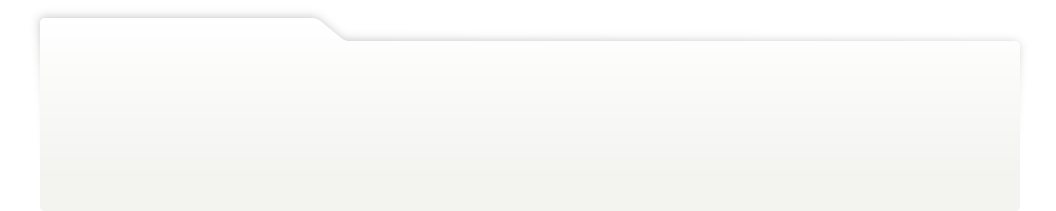
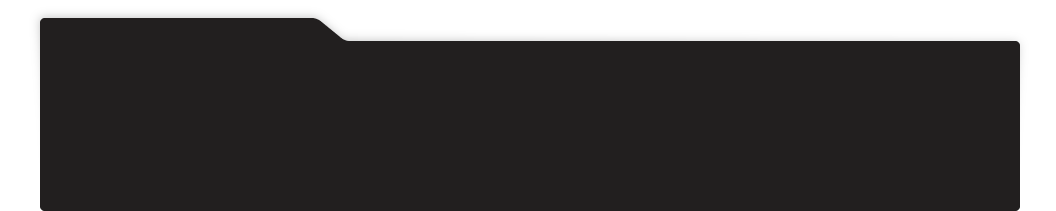
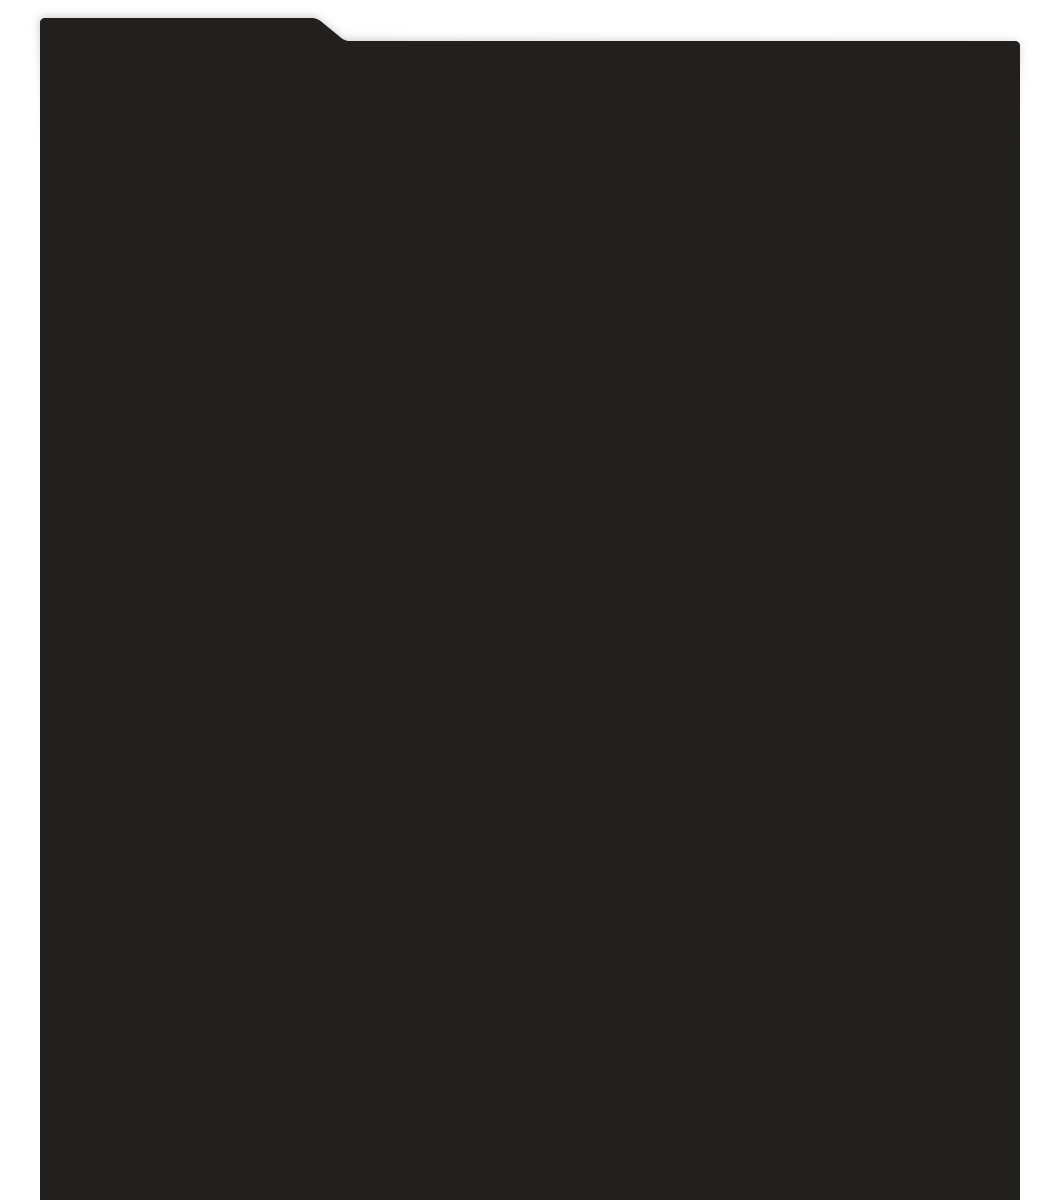
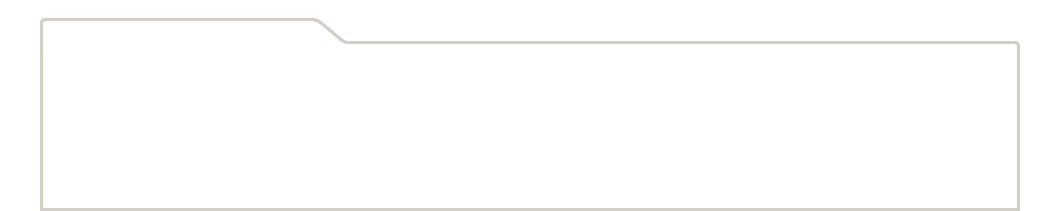
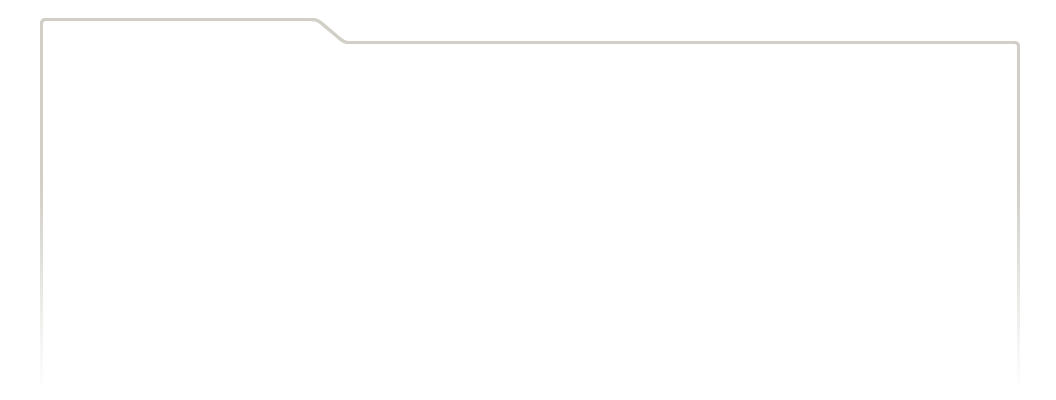
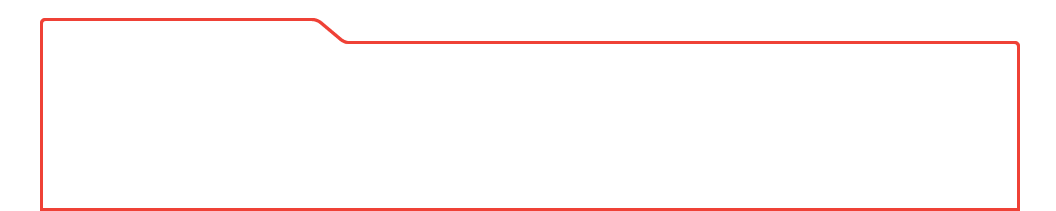
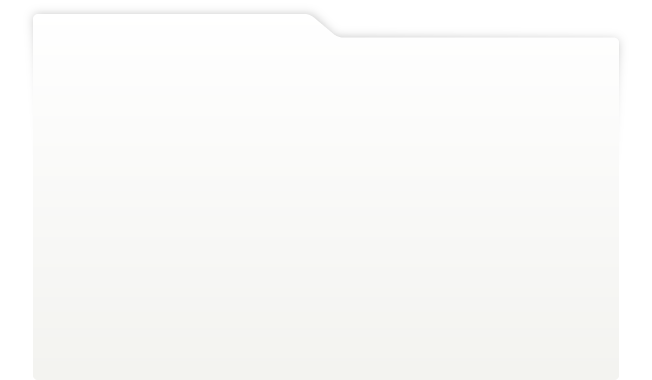
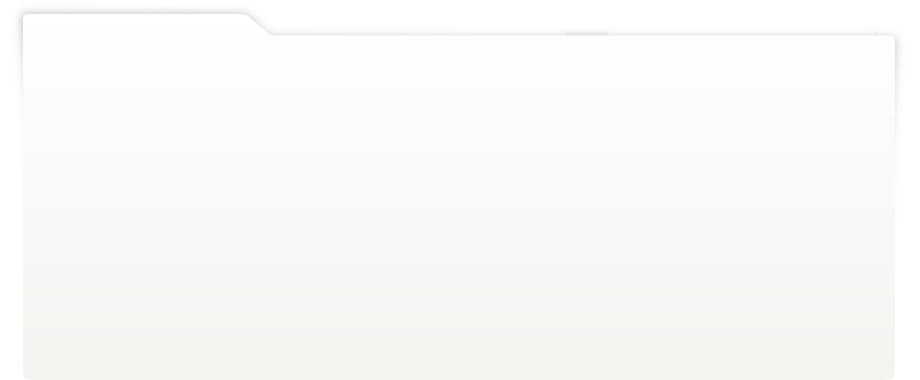
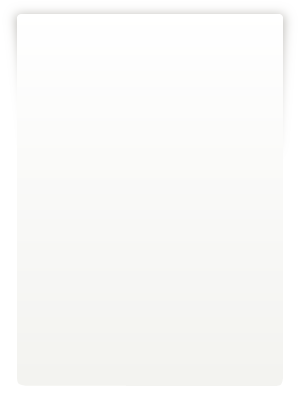
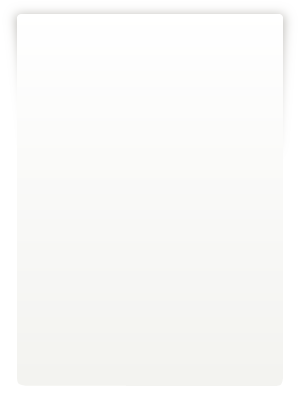
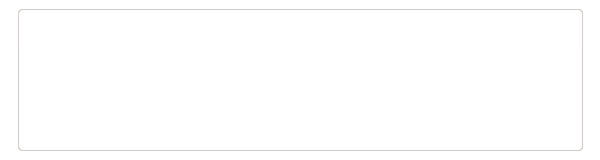
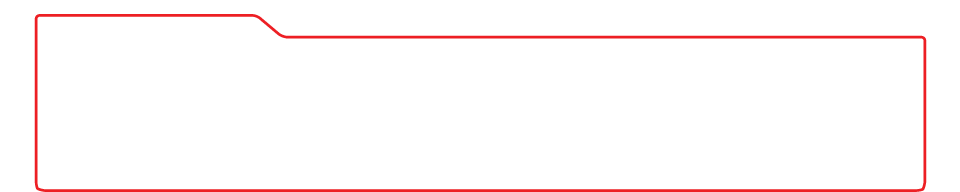
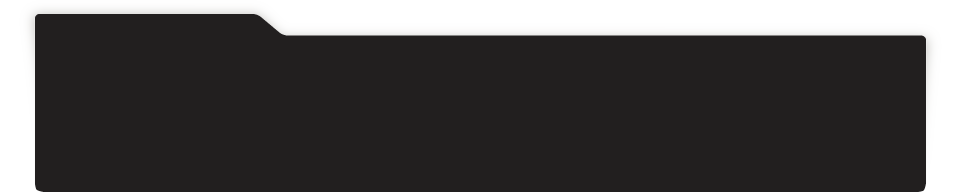
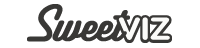
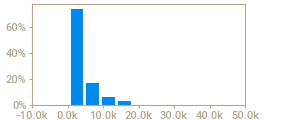
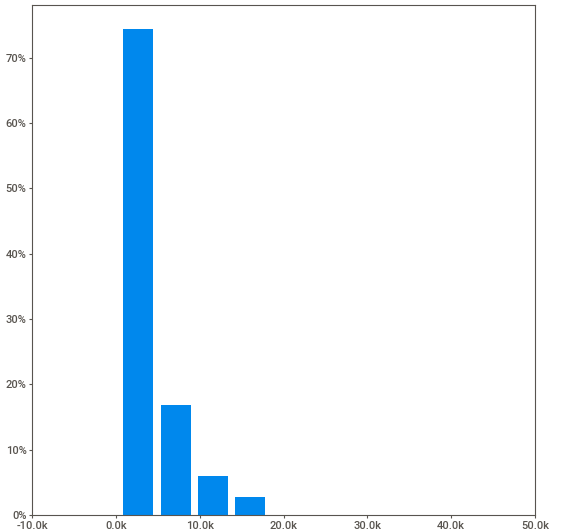
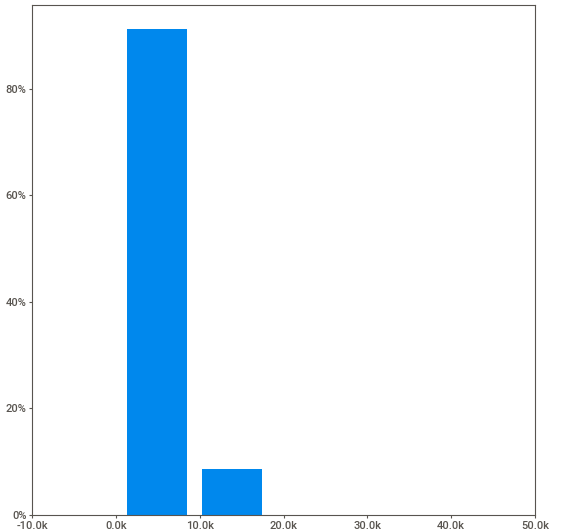
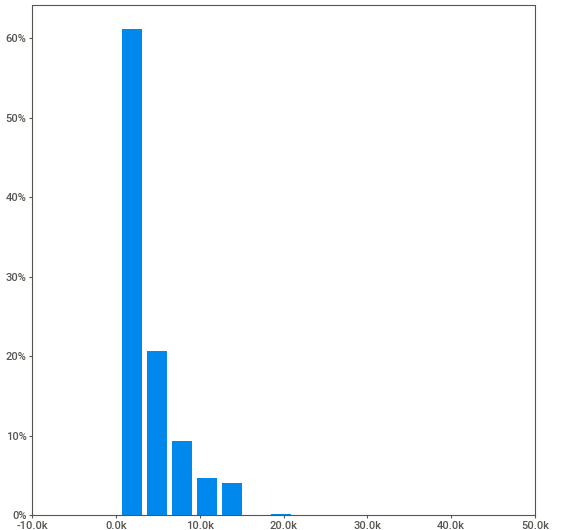
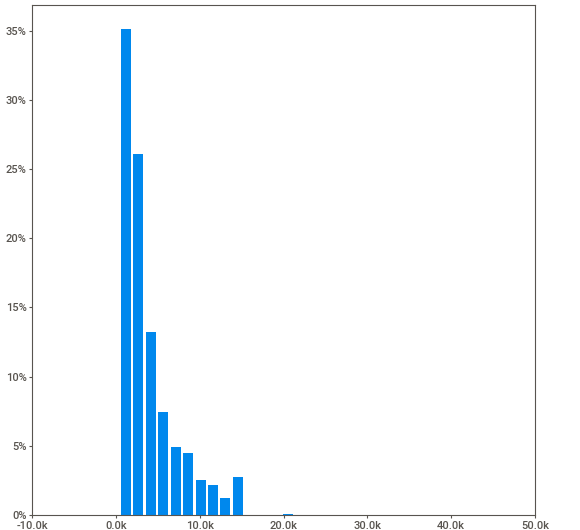
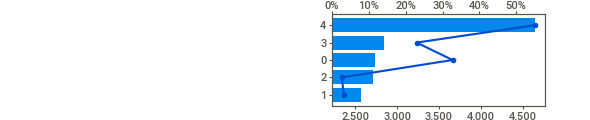
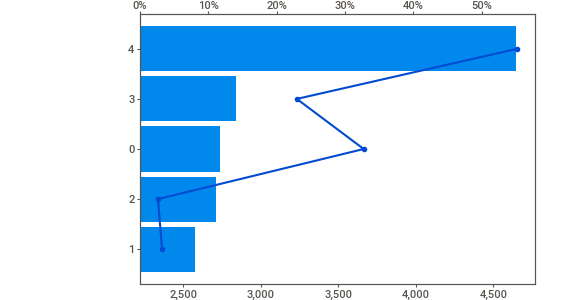
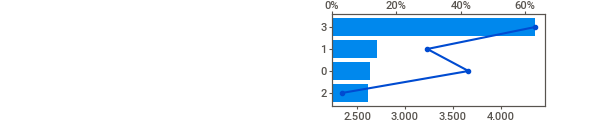
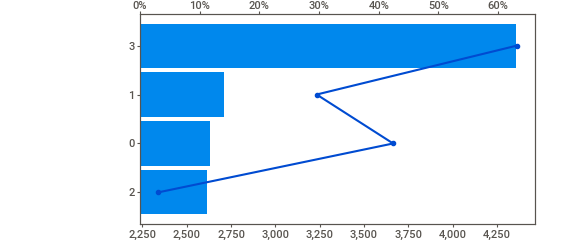
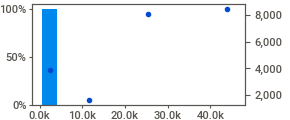
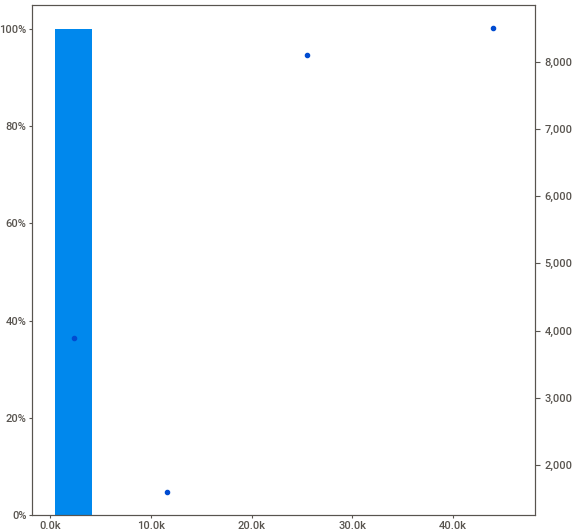
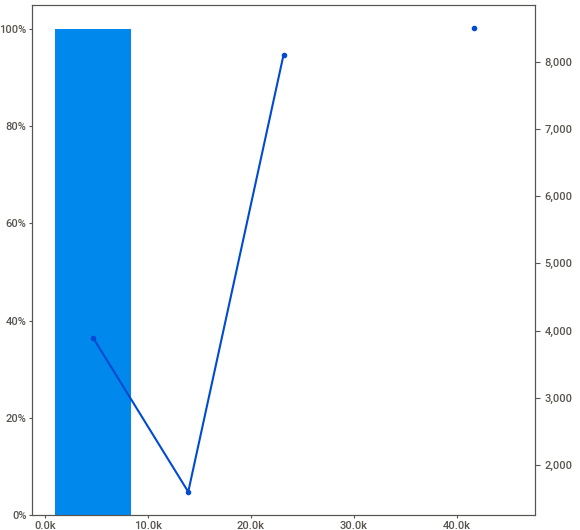
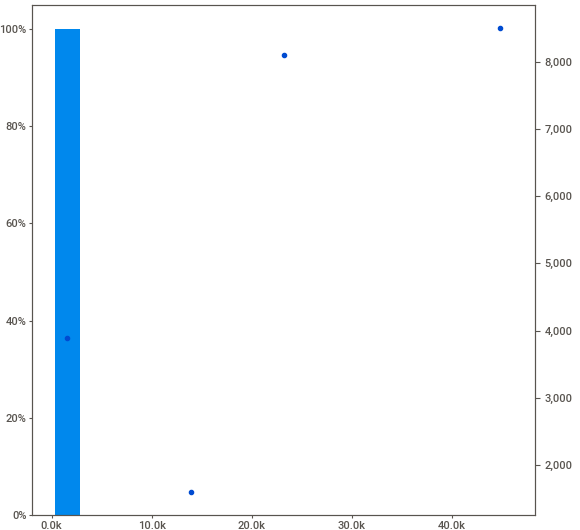
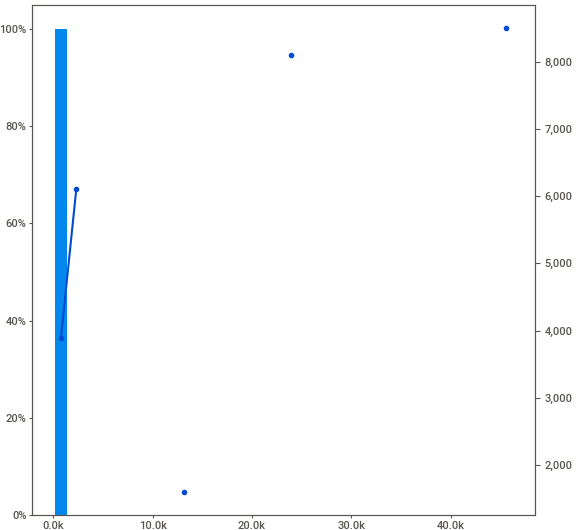
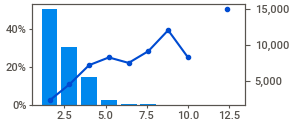
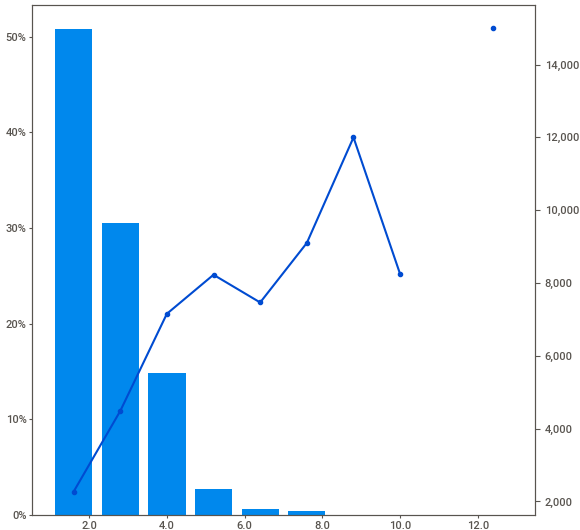
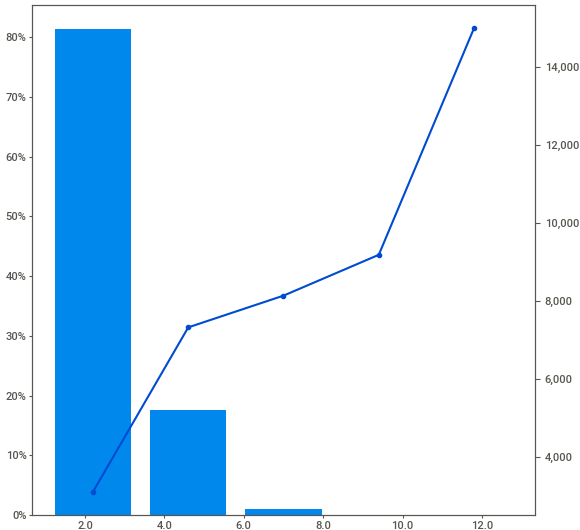
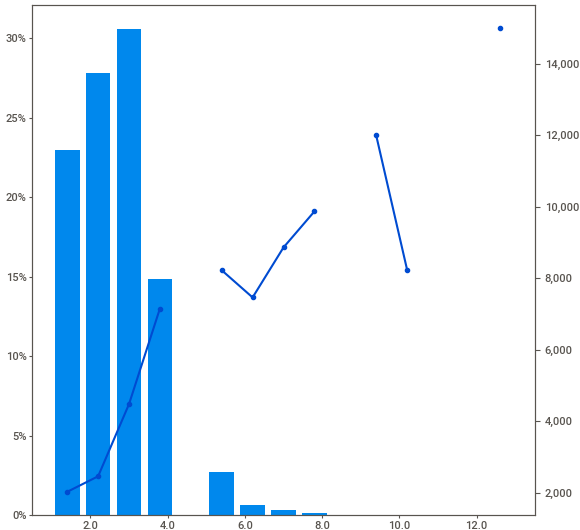
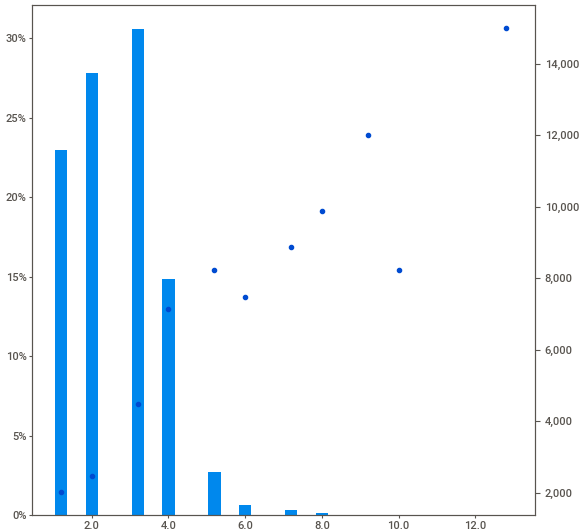
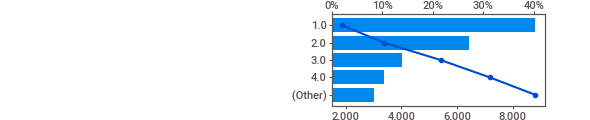
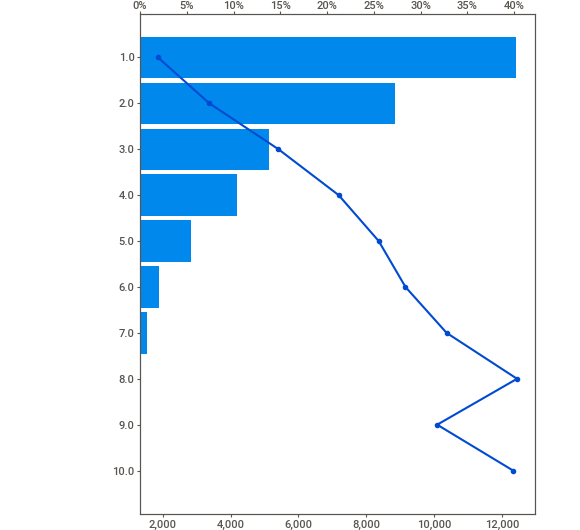
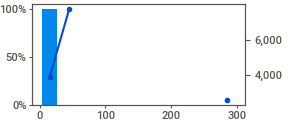
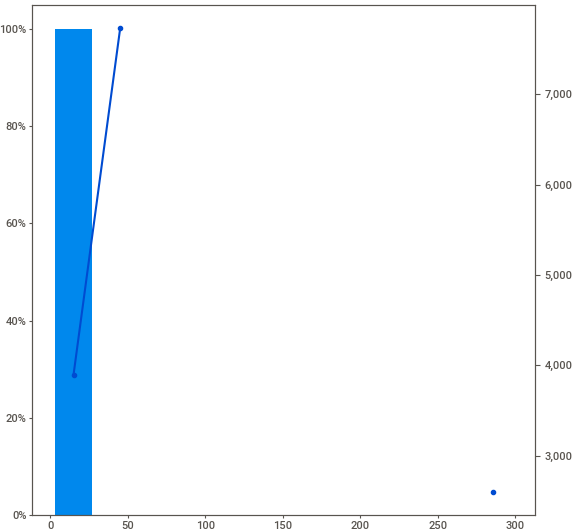
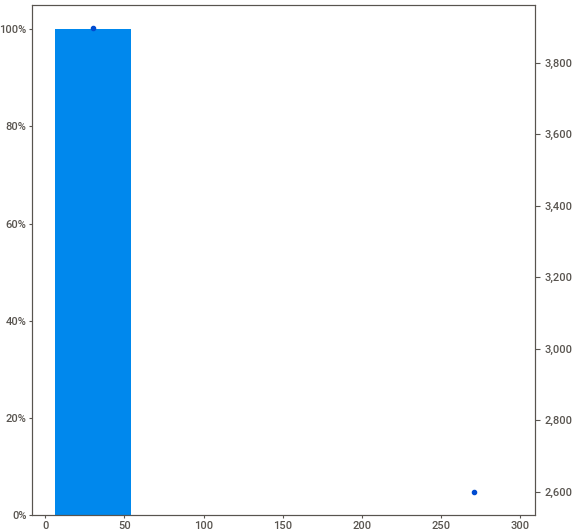
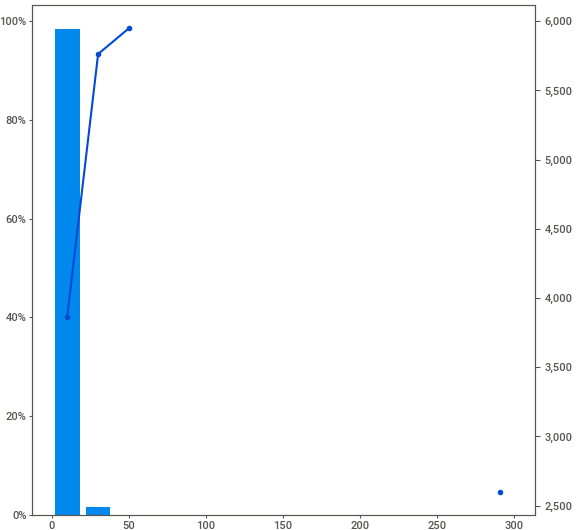
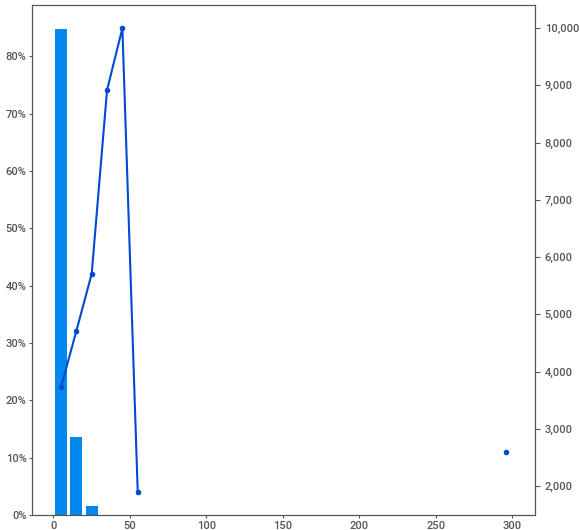
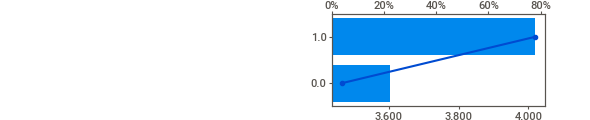
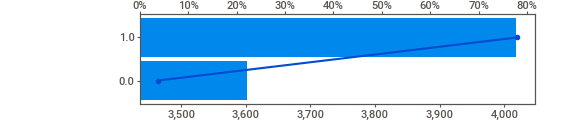
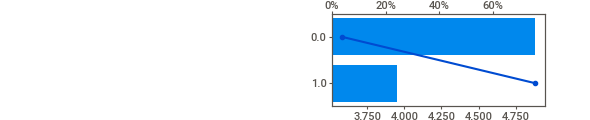
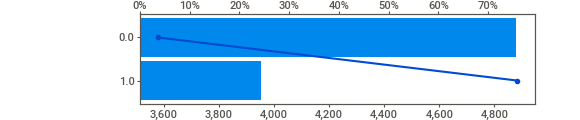
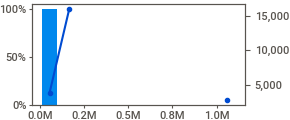
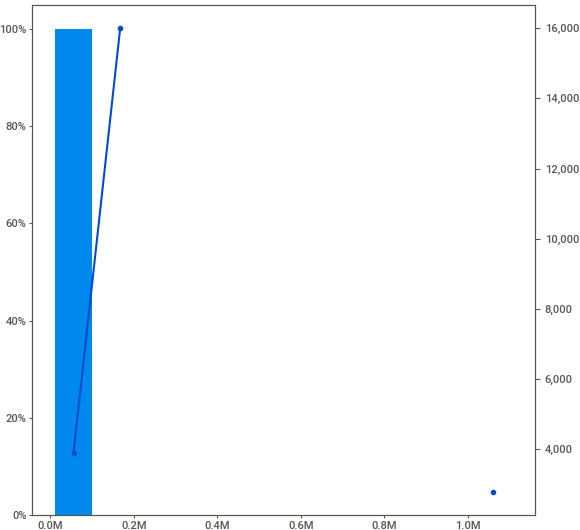
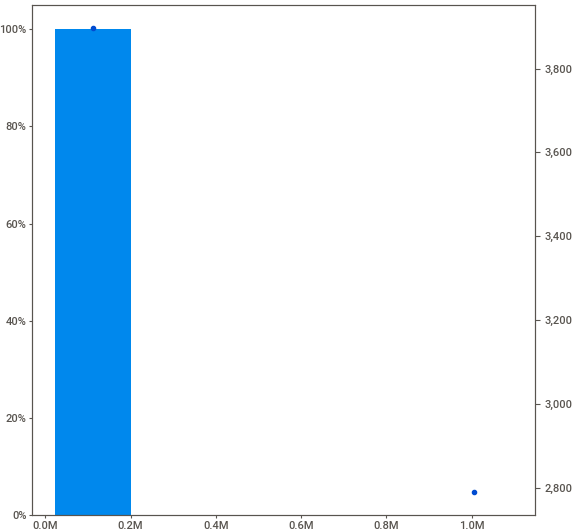
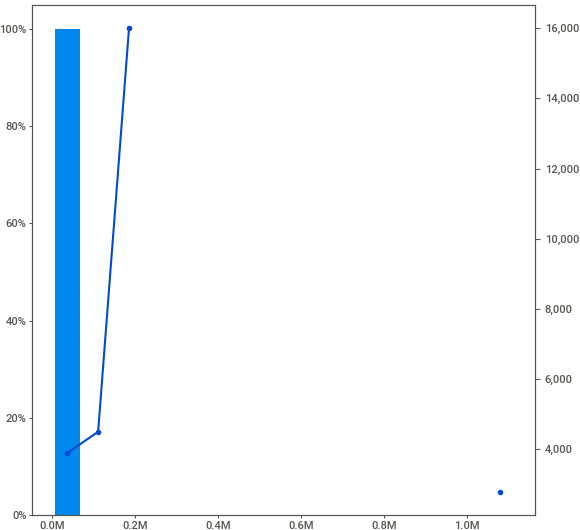
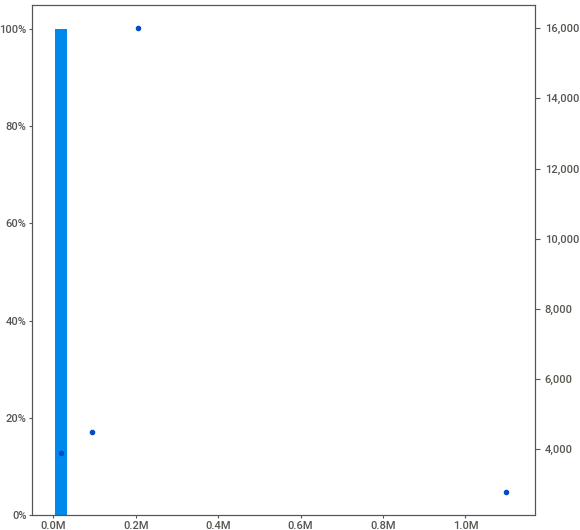
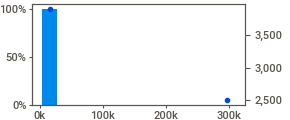
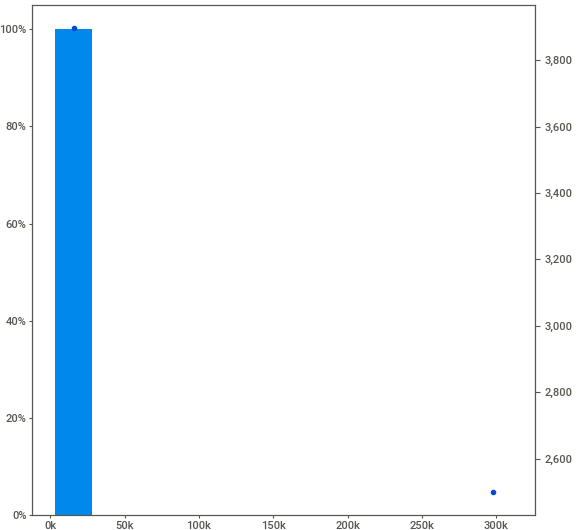
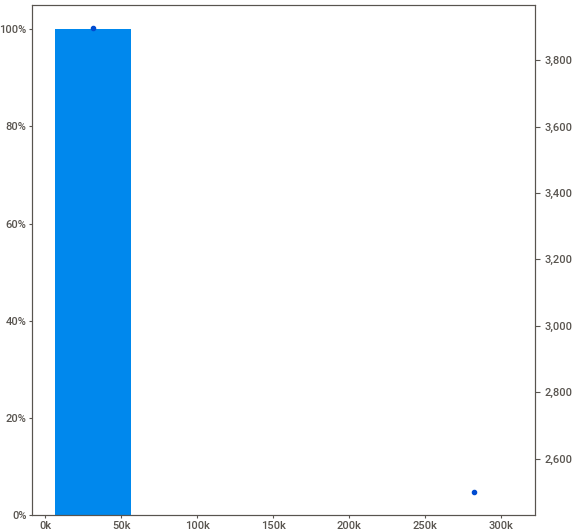
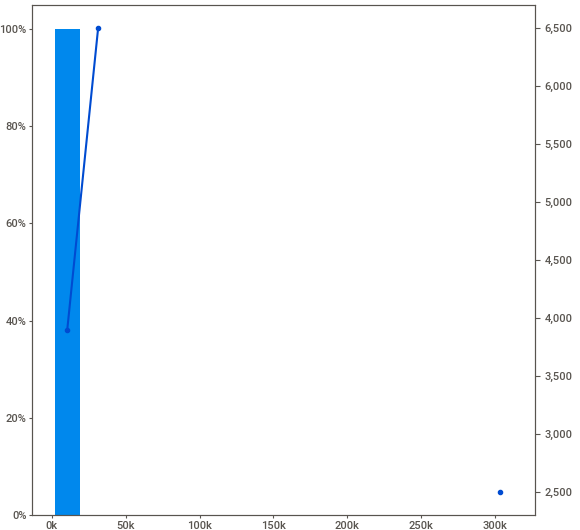
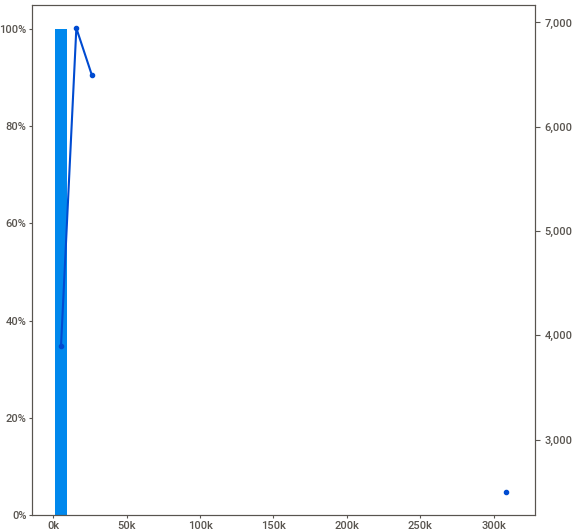
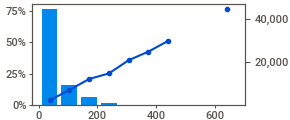
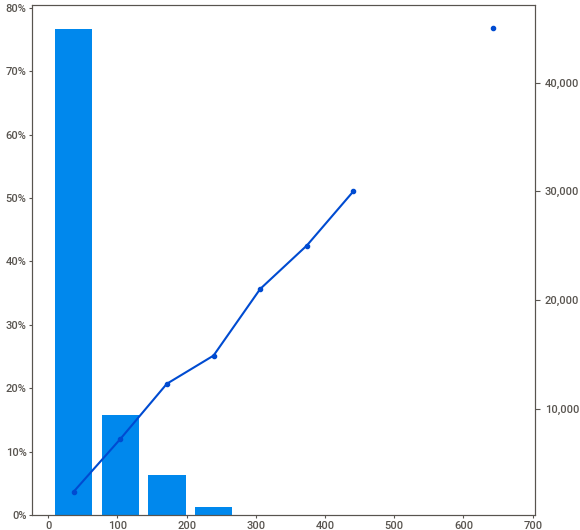
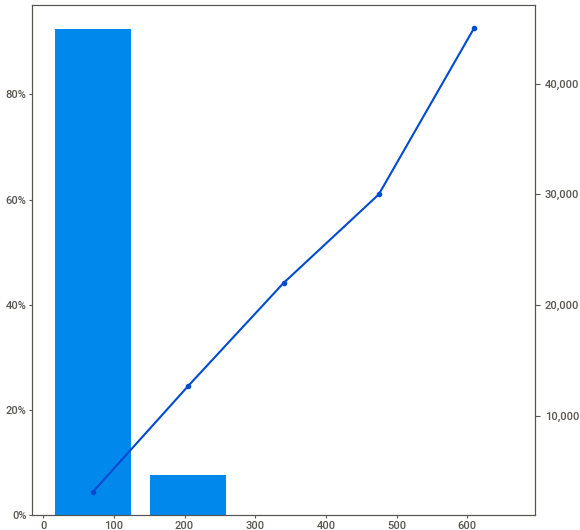
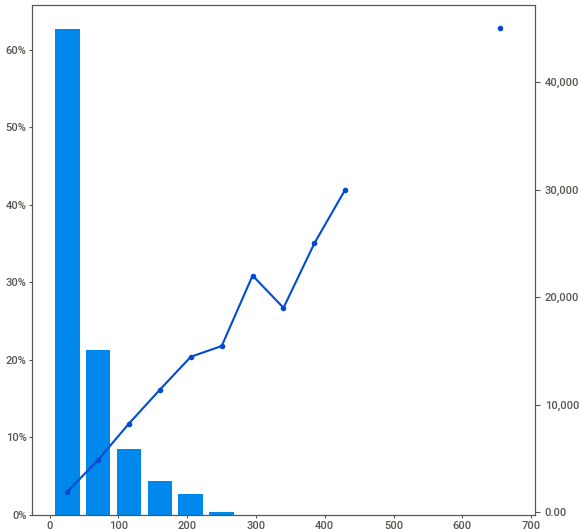
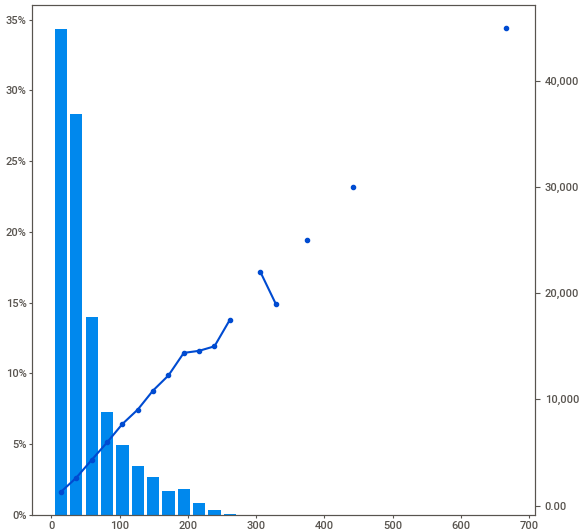
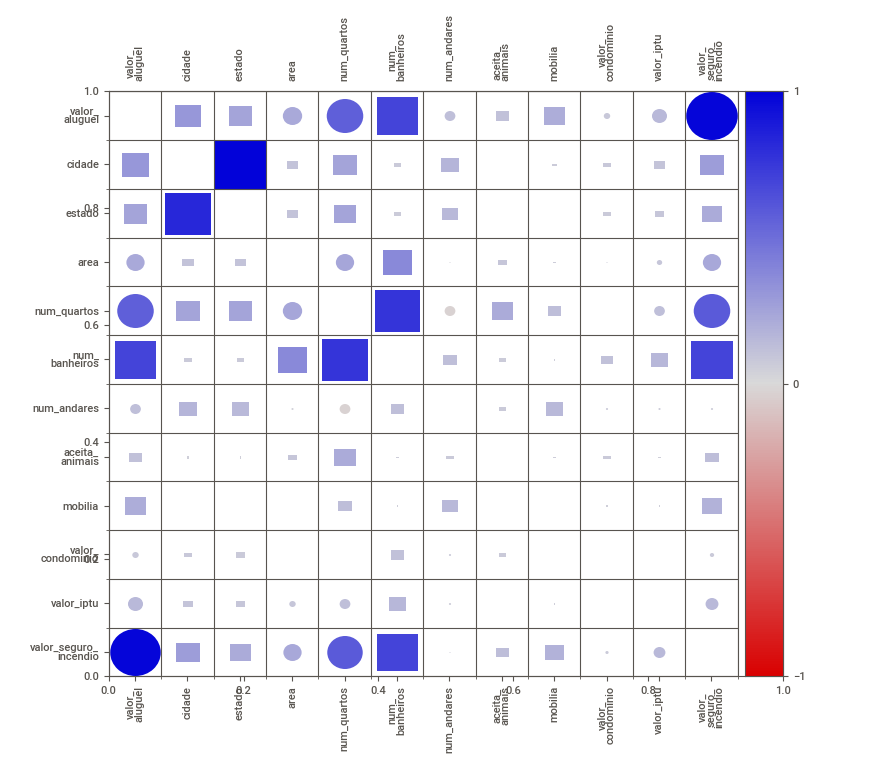
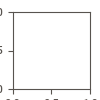

In [17]:
import sweetviz as sv
relatorio = sv.analyze(df, 'valor_aluguel')
relatorio.show_notebook()

In [18]:
X= df.drop(['valor_aluguel'], axis=1)
y= df['valor_aluguel']

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [20]:
from sklearn.linear_model import LinearRegression
import numpy as np
modelo = LinearRegression()
modelo.fit(X_train, y_train)
predicoes_teste = modelo.predict(X_test)
r2 = r2_score(y_test, predicoes_teste)
rmse = np.sqrt(mean_squared_error(y_test, predicoes_teste))

In [21]:
print(r2)
print(rmse)

0.9786028642134721
512.0121077893103


In [22]:
import joblib

joblib.dump(modelo, '/home/aluno/Documentos/api_streamlit/modelo_ML.pkl')

['/home/aluno/Documentos/api_streamlit/modelo_ML.pkl']